<a href="https://colab.research.google.com/github/Lucia1009/TFG-Plataforma-para-la-prediccion-de-potencia-electrica-generada-en-parques-eolicos/blob/desarrollo/modelos/datos_reales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dash -q
!pip install xarray netCDF4 -q

import xarray as xr

import json

from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# edp_cortado_2016 = pd.read_excel('/content/drive/MyDrive/TFG/datasets reales/edp 2016 cortado.xlsx')
# edp_cortado_2017 = pd.read_excel('/content/drive/MyDrive/TFG/datasets reales/edp 2017 cortado.xlsx')

edp_2016 = pd.read_excel('/content/drive/MyDrive/TFG/datasets reales/EDP Wind-Turbine-SCADA-signals-2016.xlsx')
edp_2017 = pd.read_excel('/content/drive/MyDrive/TFG/datasets reales/EDP Wind-Turbine-SCADA-signals-2017.xlsx')
# dsForWind_1 = pd.read_csv('/content/drive/MyDrive/TFG/datasets reales/Inland Wind Farm Dataset2(WT1).csv')
# dsForWind_2 = pd.read_csv('/content/drive/MyDrive/TFG/datasets reales/Inland Wind Farm Dataset2(WT2).csv')
# PCWG = pd.read_excel('/content/drive/MyDrive/TFG/datasets reales/PCWG Datasets.xlsx', sheet_name='Filtered Dataset')


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-101-cebbbd755e53> in update_output_div(dir1=28, dir2=0, compara=[])
     36 
     37     if dir1 in direcciones:
---> 38       direcciones[dir1] = direcciones[dir1].sort_values('ws')
        global direcciones = {0: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 1: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 2: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 3: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 4: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 5: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 6: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 7: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
Index: [], 8: Empty DataFrame
Columns: [ws1, ws2, WF_Power, wd1, wd2]
I

In [ ]:
for c in edp_2016.columns:
    print(c)

Turbine_ID
Timestamp
Gen_RPM_Max
Gen_RPM_Min
Gen_RPM_Avg
Gen_RPM_Std
Gen_Bear_Temp_Avg
Gen_Phase1_Temp_Avg
Gen_Phase2_Temp_Avg
Gen_Phase3_Temp_Avg
Hyd_Oil_Temp_Avg
Gear_Oil_Temp_Avg
Gear_Bear_Temp_Avg
Nac_Temp_Avg
Rtr_RPM_Max
Rtr_RPM_Min
Rtr_RPM_Avg
Amb_WindSpeed_Max
Amb_WindSpeed_Min
Amb_WindSpeed_Avg
Amb_WindSpeed_Std
Amb_WindDir_Relative_Avg
Amb_WindDir_Abs_Avg
Amb_Temp_Avg
Prod_LatestAvg_ActPwrGen0
Prod_LatestAvg_ActPwrGen1
Prod_LatestAvg_ActPwrGen2
Prod_LatestAvg_TotActPwr
Prod_LatestAvg_ReactPwrGen0
Prod_LatestAvg_ReactPwrGen1
Prod_LatestAvg_ReactPwrGen2
Prod_LatestAvg_TotReactPwr
HVTrafo_Phase1_Temp_Avg
HVTrafo_Phase2_Temp_Avg
HVTrafo_Phase3_Temp_Avg
Grd_InverterPhase1_Temp_Avg
Cont_Top_Temp_Avg
Cont_Hub_Temp_Avg
Cont_VCP_Temp_Avg
Gen_SlipRing_Temp_Avg
Spin_Temp_Avg
Blds_PitchAngle_Min
Blds_PitchAngle_Max
Blds_PitchAngle_Avg
Blds_PitchAngle_Std
Cont_VCP_ChokcoilTemp_Avg
Grd_RtrInvPhase1_Temp_Avg
Grd_RtrInvPhase2_Temp_Avg
Grd_RtrInvPhase3_Temp_Avg
Cont_VCP_WtrTemp_Avg
Grd_Prod_Pw

In [ ]:
for c in edp_2017.columns:
    print(c)

Turbine_ID
Timestamp
Gen_RPM_Max
Gen_RPM_Min
Gen_RPM_Avg
Gen_RPM_Std
Gen_Bear_Temp_Avg
Gen_Phase1_Temp_Avg
Gen_Phase2_Temp_Avg
Gen_Phase3_Temp_Avg
Hyd_Oil_Temp_Avg
Gear_Oil_Temp_Avg
Gear_Bear_Temp_Avg
Nac_Temp_Avg
Rtr_RPM_Max
Rtr_RPM_Min
Rtr_RPM_Avg
Amb_WindSpeed_Max
Amb_WindSpeed_Min
Amb_WindSpeed_Avg
Amb_WindSpeed_Std
Amb_WindDir_Relative_Avg
Amb_WindDir_Abs_Avg
Amb_Temp_Avg
Prod_LatestAvg_ActPwrGen0
Prod_LatestAvg_ActPwrGen1
Prod_LatestAvg_ActPwrGen2
Prod_LatestAvg_TotActPwr
Prod_LatestAvg_ReactPwrGen0
Prod_LatestAvg_ReactPwrGen1
Prod_LatestAvg_ReactPwrGen2
Prod_LatestAvg_TotReactPwr
HVTrafo_Phase1_Temp_Avg
HVTrafo_Phase2_Temp_Avg
HVTrafo_Phase3_Temp_Avg
Grd_InverterPhase1_Temp_Avg
Cont_Top_Temp_Avg
Cont_Hub_Temp_Avg
Cont_VCP_Temp_Avg
Gen_SlipRing_Temp_Avg
Spin_Temp_Avg
Blds_PitchAngle_Min
Blds_PitchAngle_Max
Blds_PitchAngle_Avg
Blds_PitchAngle_Std
Cont_VCP_ChokcoilTemp_Avg
Grd_RtrInvPhase1_Temp_Avg
Grd_RtrInvPhase2_Temp_Avg
Grd_RtrInvPhase3_Temp_Avg
Cont_VCP_WtrTemp_Avg
Grd_Prod_Pw

In [ ]:
for c in dsForWind_1.columns:
    print(c)

time
V
Vadj
D
rho
I
S
normPW


In [ ]:
for c in dsForWind_2.columns:
    print(c)

time
V
Vadj
D
rho
I
S
normPW


In [ ]:
for c in PCWG.columns:
    print(c)

Date & Time Stamp
LiDAR - 142.5m Wind Speed Mean
LiDAR - 137.5m Wind Speed Mean
LiDAR - 127.5m Wind Speed Mean
LiDAR - 117.5m Wind Speed Mean
LiDAR - 107.5m Wind Speed Mean
LiDAR - 97.5m Wind Speed Mean
LiDAR - 87.5m Wind Speed Mean
LiDAR - 77.5m Wind Speed Mean
LiDAR - 67.5m Wind Speed Mean
LiDAR - 52.5m Wind Speed Mean
LiDAR - 142.5m Windvane Mean
LiDAR - 137.5m Windvane Mean
LiDAR - 127.5m Windvane Mean
LiDAR - 117.5m Windvane Mean
LiDAR - 107.5m Windvane Mean
LiDAR - 97.5m Windvane Mean
LiDAR - 87.5m Windvane Mean
LiDAR - 77.5m Windvane Mean
LiDAR - 67.5m Windvane Mean
LiDAR - 52.5m Windvane Mean
Mast - 92.1m Wind Direction Mean
Mast - 96.0m Wind Speed Mean
Mast - 96.0m Wind Speed Std Dev
Mast - 89.1m Wind Speed Mean
Mast - 40.0m Wind Speed Mean
Mast - 96.0m Turbulence Intensity
Turbine Density
Turbine Wind Speed Mean
Turbine Power


In [ ]:
# edp=pd.concat([edp_cortado_2016,edp_cortado_2017])
# edp.head()

# # Quitar valores de edp con Grd_Prod_Pwr_Avg negativos
# edp = edp[edp['Grd_Prod_Pwr_Avg'] >= 0]
# print(edp.shape)

# # Quitar valores de dirección por encima de 359 y por debajo de 0
# edp = edp[edp['Nac_Direction_Avg'] < 360]
# edp = edp[edp['Nac_Direction_Avg'] >= 0]
# print(edp.shape)

# # Quitar valores de velocidad por debajo de 0
# edp = edp[edp['Amb_WindSpeed_Avg'] >= 0]
# print(edp.shape)

# # Quitar nan
# edp = edp.dropna()

# print(edp.shape)

# # Cambiar nombres de columnas
# edp.rename(columns={'Nac_Direction_Avg': 'wd', 'Amb_WindSpeed_Avg': 'ws', 'Grd_Prod_Pwr_Avg': 'WF_Power'}, inplace=True)
# edp.head()

In [ ]:
dsForWind_1.head()
dsForWind_1_filtrado = dsForWind_1[['Vadj', 'D', 'normPW', 'time']]

print(dsForWind_1_filtrado.shape)

dsForWind_1_filtrado = dsForWind_1_filtrado[dsForWind_1_filtrado['D'] < 360]
dsForWind_1_filtrado = dsForWind_1_filtrado[dsForWind_1_filtrado['D'] >= 0]
dsForWind_1_filtrado = dsForWind_1_filtrado[dsForWind_1_filtrado['Vadj'] >= 0]
dsForWind_1_filtrado = dsForWind_1_filtrado[dsForWind_1_filtrado['normPW'] >= 0]

dsForWind_1_filtrado = dsForWind_1_filtrado.dropna()

print(dsForWind_1_filtrado.shape)

dsForWind_1_filtrado.rename(columns={'D': 'wd', 'Vadj': 'ws', 'normPW': 'WF_Power'}, inplace=True)
dsForWind_1_filtrado.head()

(96824, 4)
(96824, 4)


,ws,wd,WF_Power,time
0,9.695124,217.9,59.775758,2008-01-01 00:00:00
1,10.595612,210.1,73.569697,2008-01-01 00:10:00
2,11.797270,206.2,95.460606,2008-01-01 00:20:00
3,11.499414,205.6,90.933333,2008-01-01 00:30:00
4,11.199954,207.8,80.872727,2008-01-01 00:40:00


In [ ]:
dsForWind_2.head()
dsForWind_2_filtrado = dsForWind_2[['Vadj', 'D', 'normPW', 'time']]

print(dsForWind_2_filtrado.shape)

dsForWind_2_filtrado = dsForWind_2_filtrado[dsForWind_2_filtrado['D'] < 360]
dsForWind_2_filtrado = dsForWind_2_filtrado[dsForWind_2_filtrado['D'] >= 0]
dsForWind_2_filtrado = dsForWind_2_filtrado[dsForWind_2_filtrado['Vadj'] >= 0]
dsForWind_2_filtrado = dsForWind_2_filtrado[dsForWind_2_filtrado['normPW'] >= 0]

dsForWind_1_filtrado = dsForWind_1_filtrado.dropna()

print(dsForWind_2_filtrado.shape)

dsForWind_2_filtrado.rename(columns={'D': 'wd', 'Vadj': 'ws', 'normPW': 'WF_Power'}, inplace=True)
# dsForWind_2_filtrado.head()
dsForWind_2

(89730, 4)
(89730, 4)


,time,V,Vadj,D,rho,I,S,normPW
0,2008-01-01 00:00:00,8.9,8.895571,217.9,1.239312,0.098876,0.283731,64.090909
1,2008-01-01 00:10:00,9.9,9.895952,210.1,1.239642,0.067677,0.252274,70.781818
2,2008-01-01 00:20:00,10.7,10.697579,206.2,1.240322,0.100935,0.175058,92.963636
3,2008-01-01 00:30:00,11.1,11.099491,205.6,1.240993,0.096396,0.208260,97.642424
4,2008-01-01 00:40:00,11.2,11.200011,207.8,1.241168,0.078571,0.200987,91.024242
...,...,...,...,...,...,...,...,...
89725,2011-10-31 23:10:00,4.2,4.223885,231.0,1.202602,0.102381,0.115917,2.175758
89726,2011-10-31 23:20:00,4.5,4.525494,233.5,1.202525,0.071111,0.298002,3.866667
89727,2011-10-31 23:30:00,4.2,4.224357,231.8,1.203006,0.076190,0.149803,3.296970
89728,2011-10-31 23:40:00,4.0,4.023190,226.3,1.202999,0.060000,0.263033,1.375758


In [ ]:
PCWG.head()
PCWG_filtrado = PCWG[['LiDAR - 97.5m Wind Speed Mean', 'LiDAR - 97.5m Windvane Mean', 'Turbine Power', 'Date & Time Stamp']]
PCWG_filtrado.rename(columns={'LiDAR - 97.5m Wind Speed Mean': 'ws', 'LiDAR - 97.5m Windvane Mean': 'wd', 'Turbine Power': 'WF_Power', 'Date & Time Stamp': 'time'}, inplace=True)

print(PCWG_filtrado.shape)

PCWG_filtrado = PCWG_filtrado[PCWG_filtrado['ws'] >= 0]
PCWG_filtrado = PCWG_filtrado[PCWG_filtrado['wd'] < 360]
PCWG_filtrado = PCWG_filtrado[PCWG_filtrado['wd'] >= 0]
PCWG_filtrado = PCWG_filtrado[PCWG_filtrado['WF_Power'] >= 0]

print(PCWG_filtrado.shape)

PCWG_filtrado = PCWG_filtrado.dropna()

print(PCWG_filtrado.shape)


(10652, 4)
(6625, 4)
(6625, 4)


<ipython-input-95-89bc69363dac>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Gráficas para cada dataset

In [ ]:
# # Contar el número de días en los que hay datos y el número de datos por día
# data_per_day = PCWG_filtrado.groupby(PCWG_filtrado['Date & Time Stamp'].dt.date)
# days_with_data = data_per_day.size().shape[0]

# print("Número de días con datos:", days_with_data)

# # Get the first date for demonstration purposes
# fechas = PCWG_filtrado['Date & Time Stamp'].dt.date.unique()
# print("Número de datos por día:", data_per_day.get_group(fechas[0]).shape[0])

# PCWG_filtrado.head()

# # for fecha in fechas:
# #    print("Número de datos por día:", data_per_day.get_group(fecha).shape[0])

# hoy=data_per_day.get_group(fechas[0])
# sum=0
# direcciones={}
# for i in range(0,360):
#    # Separo los datos para cada dirección
#     filtered_data = hoy[(hoy['wd'] <= i+0.1) & (hoy['wd'] > (i - 1 + 0.1))]

#     # Selecciono solo las columnas que me interesan
#     selected_columns = filtered_data[['ws', 'WF_Power', 'wd']]

#     direcciones[i]=selected_columns
#     sum+=selected_columns.shape[0]
# print(sum)
# print(hoy.shape[0])
# hoy

In [ ]:
# Contar el número de días en los que hay datos y el número de datos por día
# Convert 'time' column to datetime objects
dsForWind_2_filtrado['time'] = pd.to_datetime(dsForWind_2_filtrado['time'])

data_per_day = dsForWind_2_filtrado.groupby(dsForWind_2_filtrado['time'].dt.date)
days_with_data = data_per_day.size().shape[0]

print("Número de días con datos:", days_with_data)

# Get the first date for demonstration purposes
# Assuming 'Date & Time Stamp' is also a datetime column, convert it if needed
dsForWind_2_filtrado['time'] = pd.to_datetime(dsForWind_2_filtrado['time'])

fechas = dsForWind_2_filtrado['time'].dt.date.unique()
print("Número de datos por día:", data_per_day.get_group(fechas[0]).shape[0])

dsForWind_2_filtrado.head()


# for fecha in fechas:
#    print("Número de datos por día:", data_per_day.get_group(fecha).shape[0])

hoy=data_per_day.get_group(fechas[0])
sum=0
direcciones={}
for i in range(0,360):
   # Separo los datos para cada dirección
    filtered_data = hoy[(hoy['wd'] <= i+0.1) & (hoy['wd'] > (i - 1 + 0.1))]

    # Selecciono solo las columnas que me interesan
    selected_columns = filtered_data[['ws', 'WF_Power', 'wd']]

    direcciones[i]=selected_columns
    sum+=selected_columns.shape[0]

# Direcciones con más de 5 puntos
direcciones_filtradas = {k: v for k, v in direcciones.items() if v.shape[0] > 5}
print(direcciones_filtradas.keys())

print(sum)
print(hoy.shape[0])
hoy

Número de días con datos: 866
Número de datos por día: 144
dict_keys([178, 179, 180, 187, 188, 189, 190, 192, 194])
144
144


,ws,wd,WF_Power,time
0,8.895571,217.9,64.090909,2008-01-01 00:00:00
1,9.895952,210.1,70.781818,2008-01-01 00:10:00
2,10.697579,206.2,92.963636,2008-01-01 00:20:00
3,11.099491,205.6,97.642424,2008-01-01 00:30:00
4,11.200011,207.8,91.024242,2008-01-01 00:40:00
...,...,...,...,...
139,15.880172,188.6,101.466667,2008-01-01 23:10:00
140,15.173331,188.3,101.406061,2008-01-01 23:20:00
141,15.278956,187.1,101.533333,2008-01-01 23:30:00
142,14.872899,189.1,101.466667,2008-01-01 23:40:00


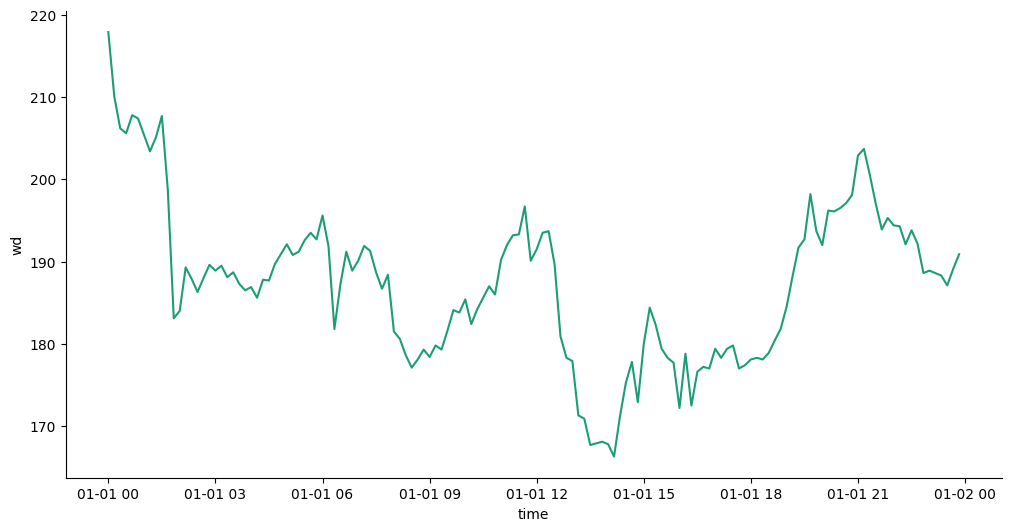

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['wd']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hoy.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('wd')

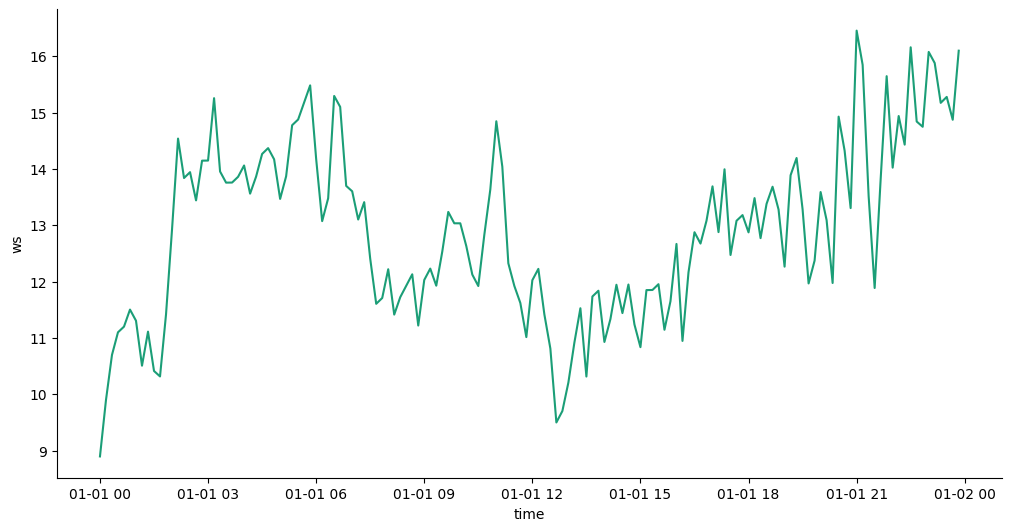

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['ws']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hoy.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('ws')

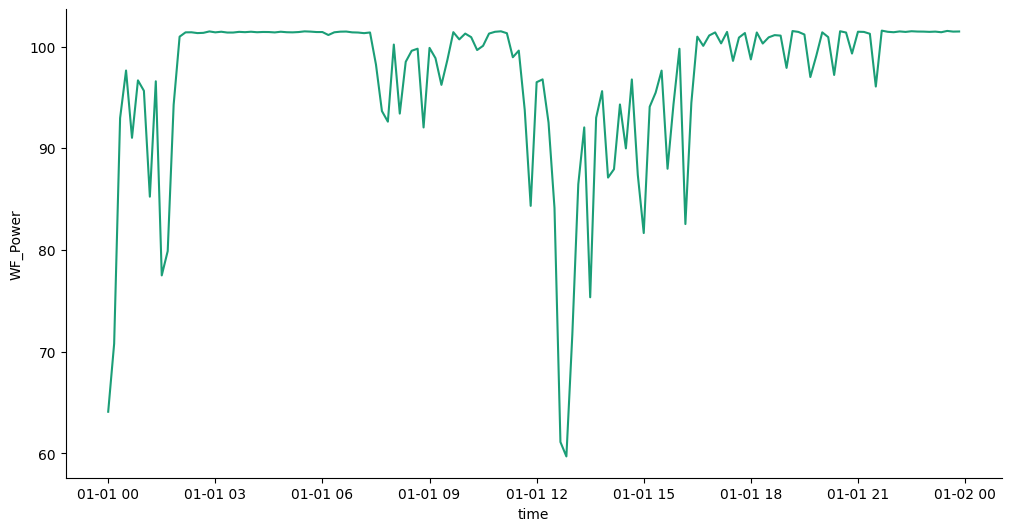

In [ ]:

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['WF_Power']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hoy.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('WF_Power')

In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Input 0: ",
        dcc.Input(id='dir_1', value=0, type='number')
    ]),
    html.Div([
        "Input 1: ",
        dcc.Input(id='dir_2', value=0, type='number')
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar gráfica 2', 'value': 'ver_dir2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        )
    ]),
    dcc.Graph(id='graph')
])




@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('compara', 'value'))
def update_output_div(dir1, dir2, compara):

    # Crear figura base
    fig = go.Figure()

    if dir1 in direcciones:
      direcciones[dir1] = direcciones[dir1].sort_values('ws')
      fig.add_trace(go.Scatter(x=direcciones[dir1]['ws'], y=direcciones[dir1]['WF_Power'], marker=dict(color='blue')))

    if 'ver_dir2' in compara and dir2 in direcciones:
      direcciones[dir2] = direcciones[dir2].sort_values('ws')
      fig.add_trace(go.Scatter(x=direcciones[dir2]['ws'], y=direcciones[dir2]['WF_Power'], marker=dict(color='red')))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

In [ ]:

# Crear figura base
fig = go.Figure()

angulo=187

direcciones[angulo] = direcciones[angulo].sort_values('ws')
fig.add_trace(go.Scatter(x=direcciones[angulo]['ws'], y=direcciones[angulo]['WF_Power'], marker=dict(color='blue')))


fig.update_layout(
    transition_duration=10,
    xaxis_title='Velocidad del viento (ws)',
    yaxis_title='Potencia del parque (WF_Power)'
)

fig.show()



---



# Otras pruebas

In [ ]:

def abrir_nc(path):
    return xr.open_dataset(path)

concurrent = abrir_nc('/content/norre_m2_concurent.nc')
all = abrir_nc('/content/norre_m2_all.nc')
UEBB=abrir_nc('/content/UEBB_v1.nc')
UEPS=abrir_nc('/content/UEPS_v1.nc')

concurrent.head()

<xarray.Dataset> Size: 7kB
Dimensions:     (time: 5)
Coordinates:
  * time        (time) datetime64[ns] 40B 1992-03-02T18:01:00 ... 1992-03-02T...
Data variables: (12/260)
    connect     (time) float64 40B ...
    connect_qc  (time) int16 10B ...
    d31_1       (time) float64 40B ...
    d31_1_qc    (time) int16 10B ...
    d34_2       (time) float64 40B ...
    d34_2_qc    (time) int16 10B ...
    ...          ...
    f7_pow      (time) float64 40B ...
    f7_pow_qc   (time) int16 10B ...
    f7_wsn      (time) float64 40B ...
    f7_wsn_qc   (time) int16 10B ...
    f7_ym       (time) float64 40B ...
    f7_ym_qc    (time) int16 10B ...
Attributes: (12/26)
    title:                   Wind farm data from Norrekaer Enge, DK
    authors:                 Kurt Schaldemose Hansen, Nikola Vasiljević and S...
    summary:                 This dataset includes SCADA data and mast measur...
    comment:                 
    history:                 2022-01-27T10:49:35\tUpdated metadata informatio...
    institution:             DTU Wind Energy
    ...                      ...
    featureType:             trajectoryProfile
    cdm_data_type:           Trajectory
    date_create:             2022-01-27T10:49:35
    date_update:             2022-01-27T10:49:35
    data_mode:               Mixed
    source:                  physical

In [ ]:
all.head()

<xarray.Dataset> Size: 10kB
Dimensions:     (time: 5)
Coordinates:
  * time        (time) datetime64[ns] 40B 1991-12-22T23:36:00 ... 1991-12-23T...
Data variables: (12/260)
    connect     (time) float64 40B ...
    connect_qc  (time) int16 10B ...
    d31_1       (time) float64 40B ...
    d31_1_qc    (time) float64 40B ...
    d34_2       (time) float64 40B ...
    d34_2_qc    (time) float64 40B ...
    ...          ...
    f7_pow      (time) float64 40B ...
    f7_pow_qc   (time) float64 40B ...
    f7_wsn      (time) float64 40B ...
    f7_wsn_qc   (time) float64 40B ...
    f7_ym       (time) float64 40B ...
    f7_ym_qc    (time) float64 40B ...
Attributes: (12/26)
    title:                   Wind farm data from Norrekaer Enge, DK
    authors:                 Kurt Schaldemose Hansen, Nikola Vasiljević and S...
    summary:                 This dataset includes SCADA data and mast measur...
    comment:                 
    history:                 2022-01-27T10:49:35\tUpdated metadata informatio...
    institution:             DTU Wind Energy
    ...                      ...
    featureType:             trajectoryProfile
    cdm_data_type:           Trajectory
    date_create:             2022-01-27T10:49:35
    date_update:             2022-01-27T10:49:35
    data_mode:               Mixed
    source:                  physical

In [ ]:
UEBB.head()

<xarray.Dataset> Size: 5kB
Dimensions:                 (Time: 5, Height: 5, Turbine: 5)
Coordinates:
  * Time                    (Time) datetime64[ns] 40B 2013-08-01 ... 2013-08-...
  * Height                  (Height) float64 40B 10.0 40.0 60.0 80.0 100.0
  * Turbine                 (Turbine) float64 40B 1.0 2.0 3.0 4.0 5.0
Data variables: (12/40)
    wind_speed              (Height, Time) float64 200B ...
    wind_direction          (Height, Time) float64 200B ...
    wind_speed_std          (Height, Time) float64 200B ...
    wind_direction_std      (Height, Time) float64 200B ...
    wind_speed_max          (Height, Time) float64 200B ...
    wind_speed_min          (Height, Time) float64 200B ...
    ...                      ...
    UST_flag                (Time) float64 40B ...
    HS                      (Time) float64 40B ...
    HS_flag                 (Time) float64 40B ...
    TKE                     (Time) float64 40B ...
    LMO                     (Time) float64 40B ...
    ws_w_corrected          (Time) float64 40B ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [ ]:
UEPS.head()

<xarray.Dataset> Size: 7kB
Dimensions:                 (Time: 5, Height: 5, Turbine: 5, Range: 5)
Coordinates:
  * Time                    (Time) datetime64[ns] 40B 2013-08-01 ... 2013-08-...
  * Height                  (Height) float64 40B 10.0 20.0 40.0 60.0 80.0
  * Turbine                 (Turbine) float64 40B 1.0 2.0 3.0 4.0 5.0
Dimensions without coordinates: Range
Data variables: (12/48)
    range                   (Range) float64 40B ...
    wind_speed              (Height, Time) float64 200B ...
    wind_direction          (Height, Time) float64 200B ...
    wind_speed_std          (Height, Time) float64 200B ...
    wind_direction_std      (Height, Time) float64 200B ...
    wind_speed_max          (Height, Time) float64 200B ...
    ...                      ...
    lidar_wind_direction    (Range, Time) float64 200B ...
    lidar_wind_speed_std    (Range, Time) float64 200B ...
    lidar_ws_u              (Range, Time) float64 200B ...
    lidar_ws_v              (Range, Time) float64 200B ...
    lidar_ws_w              (Range, Time) float64 200B ...
    lidar_availability      (Range, Time) float64 200B ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50



---



# json

In [ ]:
with open('wind_plant_data.json') as f:
    data = json.load(f)

print(data)

with open('turbine_80.json') as f:
    turbine_80 = json.load(f)


{'turbines': {'turbine_id': [80, 81, 82, 83, 84], 'json_filename': ['turbine_80.json', 'turbine_81.json', 'turbine_82.json', 'turbine_83.json', 'turbine_84.json'], 'compressed_filename': ['turbine_80.json.bz2', 'turbine_81.json.bz2', 'turbine_82.json.bz2', 'turbine_83.json.bz2', 'turbine_84.json.bz2']}, 'alarm_dictionary': {'alarm_id': [0, 5, 7, 9, 13, 16, 23, 30, 31, 41, 45, 55, 66, 93, 100, 102, 103, 110, 111, 113, 114, 120, 121, 128, 130, 134, 154, 155, 200, 201, 202, 203, 205, 206, 220, 221, 226, 230, 231, 233, 235, 236, 237, 238, 239, 241, 243, 250, 251, 260, 261, 265, 266, 267, 320, 346, 347, 348, 349, 350, 414, 415, 416, 431, 474, 500, 530, 531, 533, 535, 554, 562, 601, 613, 614, 640, 663, 700, 701, 708, 709, 715, 719, 730, 731, 732, 733, 734, 742, 743, 760, 770, 771, 772, 773, 775, 776, 779, 780, 904, 907, 916, 944, 963, 964, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1113, 1207, 1210, 1213, 1215, 1224, 1271, 1272, 1273, 1280

In [ ]:
turbine_80_df = pd.DataFrame(turbine_80['analog_data'])

print(turbine_80_df['turbine_id'].unique())
for c in turbine_80_df.columns:
    print(c)
turbine_80_df.head()

turbine_80_signals=pd.DataFrame(turbine_80['alarms'])
turbine_80_signals.head()

[80]
turbine_id
date_time
wgdc_avg_TriGri_PhV_phsA
wgdc_avg_TriGri_PhV_phsB
wgdc_avg_TriGri_PhV_phsC
wgdc_avg_TriGri_PhV
wgdc_avg_TriGri_A_phsA
wgdc_avg_TriGri_A_phsB
wgdc_avg_TriGri_A_phsC
wgdc_avg_TriGri_A
wgdc_avg_TriGri_PF
wgdc_avg_TriGri_Hz
wgdc_avg_TriGri_PwrAt
wgdc_avg_TriGri_PwrReact
wgdc_avg_GdcTmp_TrfGn
wgdc_avg_LoVTmp
wgdc_max_TriGri_PhV_phsA
wgdc_max_TriGri_PhV_phsB
wgdc_max_TriGri_PhV_phsC
wgdc_max_TriGri_PhV
wgdc_max_TriGri_A_phsA
wgdc_max_TriGri_A_phsB
wgdc_max_TriGri_A_phsC
wgdc_max_TriGri_A
wgdc_max_TriGri_PF
wgdc_max_TriGri_Hz
wgdc_max_TriGri_PwrAt
wgdc_max_TriGri_PwrReact
wgdc_max_GdcTmp_TrfGn
wgdc_max_LoVTmp
wgdc_min_TriGri_PhV_phsA
wgdc_min_TriGri_PhV_phsB
wgdc_min_TriGri_PhV_phsC
wgdc_min_TriGri_PhV
wgdc_min_TriGri_A_phsA
wgdc_min_TriGri_A_phsB
wgdc_min_TriGri_A_phsC
wgdc_min_TriGri_A
wgdc_min_TriGri_PF
wgdc_min_TriGri_Hz
wgdc_min_TriGri_PwrAt
wgdc_min_TriGri_PwrReact
wgdc_min_GdcTmp_TrfGn
wgdc_min_LoVTmp
wgdc_sdv_TriGri_PhV_phsA
wgdc_sdv_TriGri_PhV_phsB
wgdc_sdv_

,turbine_id,alarm_id,alarm_desc,date_time_ini,date_time_end,availability
0,80,0,System OK,2012-01-01 01:00:00,2012-01-06 11:22:41,1
1,80,1595,Selftest,2012-01-06 11:22:41,2012-01-06 11:25:40,1
2,80,0,System OK,2012-01-06 11:25:40,2012-01-06 11:27:12,1
3,80,5707,Gen <> RotIGR > SH,2012-01-06 11:27:12,2012-01-06 11:27:56,0
4,80,0,System OK,2012-01-06 11:27:56,2012-01-09 04:35:21,1


In [ ]:
turbine_80_filtrado=turbine_80_df[['date_time','wgdc_avg_TriGri_PwrAt', 'wgdc_sdv_TriGri_PwrAt', 'wnac_avg_Dir','wnac_avg_Wdir1', 'wnac_avg_Wdir2', 'wnac_avg_WSpd1',  'wnac_avg_WSpd2']]

turbine_80_filtrado.rename(columns={'date_time':'time', 'wgdc_avg_TriGri_PwrAt':'WF_Power', 'wgdc_sdv_TriGri_PwrAt':'std_Power', 'wnac_avg_Dir': 'wd', 'wnac_avg_Wdir1': 'wd1', 'wnac_avg_Wdir2': 'wd2', 'wnac_avg_WSpd1': 'ws1', 'wnac_avg_WSpd2': 'ws2'}, inplace=True)

turbine_80_filtrado=turbine_80_filtrado.dropna()

print(turbine_80_filtrado.shape)

# Quitar los periodos de tiempo que se muestran en turbine_80_signals
turbine_80_signals['date_time_ini'] = pd.to_datetime(turbine_80_signals['date_time_ini'])
turbine_80_signals['date_time_end'] = pd.to_datetime(turbine_80_signals['date_time_end'])
turbine_80_filtrado['time'] = pd.to_datetime(turbine_80_filtrado['time'])

for fila in turbine_80_signals.itertuples():
    inicio = fila.date_time_ini
    fin = fila.date_time_end
    if fila.alarm_desc != 'System OK':
      turbine_80_filtrado=turbine_80_filtrado[~((turbine_80_filtrado['time'] >= inicio) & (turbine_80_filtrado['time'] <= fin))]

print(turbine_80_filtrado.shape)

# Filtrar los datos de velocidad de viento, dirección y potencia
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd'] < 360]
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd'] >= 0]
print(turbine_80_filtrado.shape)
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd1'] < 360]
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd1'] >= 0]
print(turbine_80_filtrado.shape)
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd2'] < 360]
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['wd2'] >= 0]
print(turbine_80_filtrado.shape)
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['ws1'] >= 0]
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['ws2'] >= 0]
print(turbine_80_filtrado.shape)
turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['WF_Power'] >= 0]
print(turbine_80_filtrado.shape)
# turbine_80_filtrado=turbine_80_filtrado[turbine_80_filtrado['std_Power'] < 170]
print(turbine_80_filtrado.shape)

turbine_80_filtrado.head()

turbine_80_filtrado['std_Power'].describe()


<ipython-input-122-c373e5638256>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(215460, 8)
(77568, 8)
(77568, 8)
(77568, 8)
(77568, 8)
(77568, 8)
(63535, 8)
(63535, 8)


,std_Power
count,63535.000000
mean,118.990729
std,126.739003
min,1.645660
25%,31.823450
50%,73.087800
75%,165.228000
max,1255.820000


In [ ]:
def direcciones_hoy(df, columnas):

  # Contar el número de días en los que hay datos y el número de datos por día
  # df['time'] = pd.to_datetime(df['time'])

  # data_per_day = df.groupby(df['time'].dt.date)
  # days_with_data = data_per_day.size().shape[0]

  # print("Número de días con datos:", days_with_data)

  # df['time'] = pd.to_datetime(df['time'])

  # fechas = df['time'].dt.date.unique()
  # print("Número de datos por día:", data_per_day.get_group(fechas[0]).shape[0])

  # df.head()

  # hoy=data_per_day.get_group(fechas[0])
  sum=0
  direcciones={}
  for i in range(0,360):
    # Separo los datos para cada dirección
      filtered_data = turbine_80_filtrado[(turbine_80_filtrado['wd'] <= i+0.1) & (turbine_80_filtrado['wd'] > (i - 1 + 0.1))]

      # Selecciono solo las columnas que me interesan
      selected_columns = filtered_data[columnas]

      direcciones[i]=selected_columns
      sum+=selected_columns.shape[0]
  return direcciones


direcciones=direcciones_hoy(turbine_80_filtrado, ['ws1', 'ws2', 'WF_Power', 'wd1', 'wd2'])


# Direcciones con más de 5 puntos para ver qué dirección representar en la gráfica
direcciones_filtradas = {k: v for k, v in direcciones.items() if v.shape[0] > 5}
print(direcciones_filtradas.keys())

print(sum)
print(hoy.shape[0])
hoy

dict_keys([4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 2

,ws,wd,WF_Power,time
0,8.895571,217.9,64.090909,2008-01-01 00:00:00
1,9.895952,210.1,70.781818,2008-01-01 00:10:00
2,10.697579,206.2,92.963636,2008-01-01 00:20:00
3,11.099491,205.6,97.642424,2008-01-01 00:30:00
4,11.200011,207.8,91.024242,2008-01-01 00:40:00
...,...,...,...,...
139,15.880172,188.6,101.466667,2008-01-01 23:10:00
140,15.173331,188.3,101.406061,2008-01-01 23:20:00
141,15.278956,187.1,101.533333,2008-01-01 23:30:00
142,14.872899,189.1,101.466667,2008-01-01 23:40:00


In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Input 0: ",
        dcc.Input(id='dir_1', value=0, type='number')
    ]),
    html.Div([
        "Input 1: ",
        dcc.Input(id='dir_2', value=0, type='number')
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar gráfica 2', 'value': 'ver_dir2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        )
    ]),
    dcc.Graph(id='graph')
])




@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('compara', 'value'))
def update_output_div(dir1, dir2, compara):

    # Crear figura base
    fig = go.Figure()

    if dir1 in direcciones:
      direcciones[dir1] = direcciones[dir1].sort_values('ws1')
      fig.add_trace(go.Scatter(x=direcciones[dir1]['ws1'], y=direcciones[dir1]['WF_Power'], mode='markers', marker=dict(color='blue'))) # Cambio aquí

    if 'ver_dir2' in compara and dir2 in direcciones:
      direcciones[dir2] = direcciones[dir2].sort_values('ws2')
      fig.add_trace(go.Scatter(x=direcciones[dir2]['ws2'], y=direcciones[dir2]['WF_Power'], mode='markers', marker=dict(color='red'))) # Cambio aquí

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig



if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


<IPython.core.display.Javascript object>

In [ ]:

# Crear figura base
fig = go.Figure()

angulo=230

direcciones[angulo] = direcciones[angulo].sort_values('ws1')
fig.add_trace(go.Scatter(x=direcciones[angulo]['ws1'], y=direcciones[angulo]['WF_Power'], marker=dict(color='blue')))


fig.update_layout(
    transition_duration=10,
    xaxis_title='Velocidad del viento (ws)',
    yaxis_title='Potencia del parque (WF_Power)'
)

fig.show()